## **Writing a Data Science  Blog**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('survey_results_public.csv')
df  = df.dropna(subset=['Salary'], axis=0)
df_dropna = df.dropna(axis=0)


### Let's take a look at the dataset 

In [3]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

#Provide the number of rows and the number of columns in the dataset

In [4]:
num_rows = df.shape[0] 
num_cols = df.shape[1]  

print(" number of rows =  ", num_rows," the number of columns = ",  num_cols) 

 number of rows =   12891  the number of columns =  154


In [5]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,Disagree,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Disagree,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN
18,19,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82500.0,NaN
22,23,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,...,Somewhat agree,Male,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree,100764.0,NaN


In [6]:
df.tail()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
51371,51372,Professional developer,No,Netherlands,No,Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Strongly disagree,Agree,74193.548387,NaN
51378,51379,Professional developer,"Yes, I contribute to open source projects",Cyprus,No,Employed part-time,Secondary school,NaN,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Strongly disagree,Male,A doctoral degree,NaN,Somewhat agree,Strongly agree,Strongly disagree,Strongly agree,107526.881720,NaN
51382,51383,Professional developer,"Yes, I program as a hobby",France,No,Employed full-time,Master's degree,Computer science or software engineering,Never,100 to 499 employees,...,Disagree,Male,A master's degree,White or of European descent,Agree,Agree,Disagree,Somewhat agree,32258.064516,NaN
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.000000,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.000000,NaN


In [7]:
df2 = pd.read_csv('./survey_results_schema.csv')
def get_desc ( col_name, schema):
    '''
    input
    output
    '''
    desciption = list(schema[schema['Column']==col_name]['Question'])[0]
    return desciption

In [8]:
print( get_desc('FormalEducation',df2))

Which of the following best describes the highest level of formal education that you've completed?


In [9]:
df['FormalEducation'].value_counts()

Bachelor's degree                                                    6407
Master's degree                                                      3077
Some college/university study without earning a bachelor's degree    2050
Secondary school                                                      761
Doctoral degree                                                       293
Professional degree                                                   143
I never completed any formal education                                 60
Primary/elementary school                                              55
I prefer not to answer                                                 45
Name: FormalEducation, dtype: int64

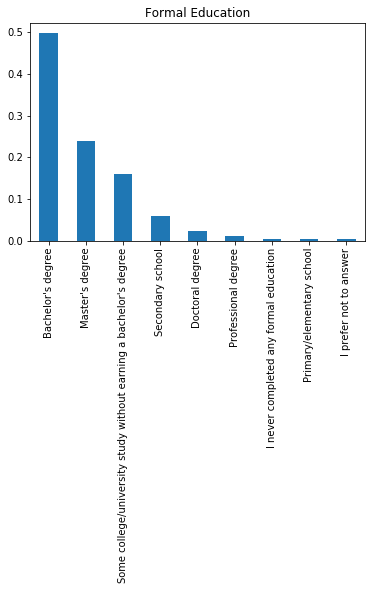

In [10]:
ed_vals =df.FormalEducation.value_counts()
(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

In [11]:
df_FormalEducation = df.loc[:, ['FormalEducation','Salary']].groupby(by='FormalEducation').mean().sort_values('Salary', ascending=False)

In [12]:
df_FormalEducation


,Salary
FormalEducation,
Doctoral degree,78527.933053
Primary/elementary school,62677.337356
Master's degree,58250.838766
Bachelor's degree,56914.358553
Some college/university study without earning a bachelor's degree,55912.810459
I never completed any formal education,44430.660621
Secondary school,40395.148419
Professional degree,39503.658863
I prefer not to answer,38284.836141


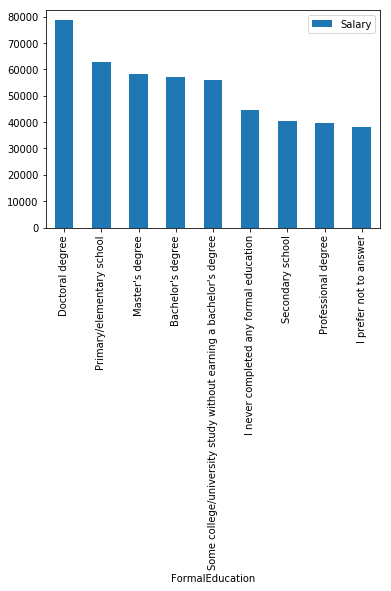

In [13]:
df_FormalEducation.plot(kind='bar')



In [14]:
print( get_desc('MajorUndergrad',df2))

Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?


In [15]:
df_counts_majorUndergrad =df['MajorUndergrad'].value_counts()

In [16]:
df_counts_majorUndergrad

Computer science or software engineering                        6483
Computer engineering or electrical/electronics engineering      1097
Computer programming or Web development                          992
A natural science                                                491
Information technology, networking, or system administration     477
Mathematics or statistics                                        447
A non-computer-focused engineering discipline                    425
A humanities discipline                                          278
Something else                                                   274
A business discipline                                            222
Fine arts or performing arts                                     195
Management information systems                                   182
A social science                                                 165
I never declared a major                                         162
Psychology                        

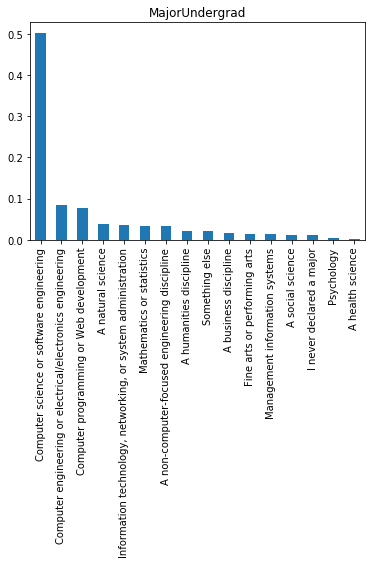

In [17]:
ed_vals =df.MajorUndergrad.value_counts()
(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("MajorUndergrad");

In [18]:
df_MajorUndergrad = df.loc[:, ['MajorUndergrad','Salary']].groupby(by='MajorUndergrad').mean().sort_values('Salary', ascending=False)

In [19]:
df_MajorUndergrad


,Salary
MajorUndergrad,
Psychology,81140.118824
A social science,71763.452093
Fine arts or performing arts,71446.616378
Management information systems,69320.194888
A humanities discipline,68127.027419
A business discipline,67613.345308
A natural science,65908.110996
Mathematics or statistics,65691.721530
I never declared a major,64237.371671


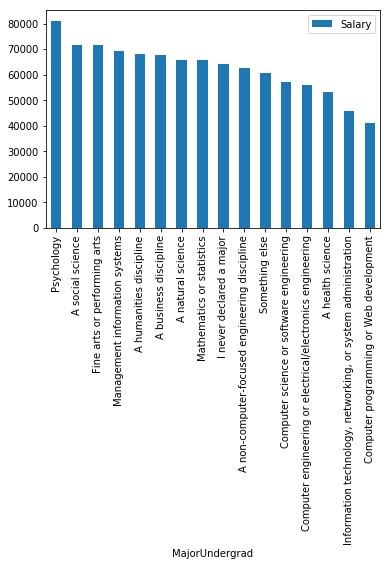

In [20]:
df_MajorUndergrad.plot(kind='bar')


In [21]:
print( get_desc('HighestEducationParents',df2))

What is the highest level of education received by either of your parents?


In [22]:
df['HighestEducationParents'].value_counts()


A bachelor's degree                                    3550
A master's degree                                      2603
High school                                            2051
Some college/university study, no bachelor's degree    1619
A doctoral degree                                       625
A professional degree                                   551
Primary/elementary school                               414
I don't know/not sure                                   167
I prefer not to answer                                   65
No education                                             58
Name: HighestEducationParents, dtype: int64

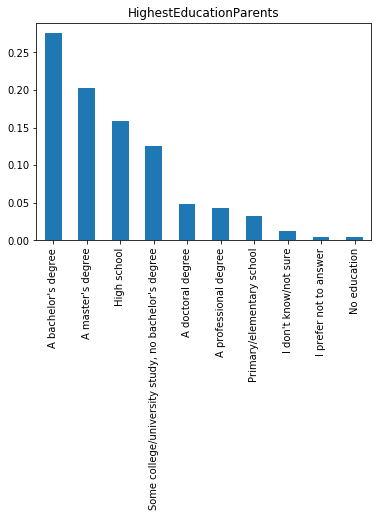

In [23]:
ed_vals =df.HighestEducationParents.value_counts()
(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("HighestEducationParents");

In [24]:
df_HighestEducationParents =df.loc[:, ['HighestEducationParents','Salary']].groupby(by='HighestEducationParents').mean().sort_values('Salary', ascending=False)

In [25]:
df_HighestEducationParents

,Salary
HighestEducationParents,
A doctoral degree,68611.436276
A professional degree,64436.422260
A master's degree,60454.005886
"Some college/university study, no bachelor's degree",60013.580080
A bachelor's degree,57204.205486
High school,50930.764811
I don't know/not sure,49553.558412
I prefer not to answer,45081.722501
Primary/elementary school,39337.837086


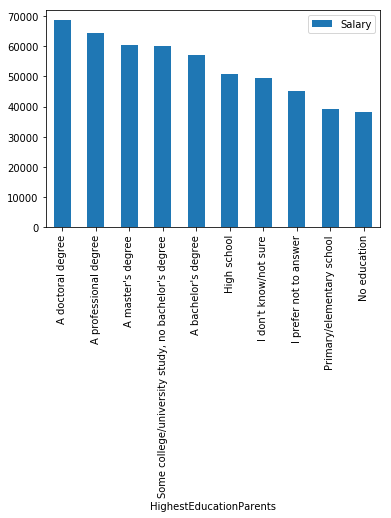

In [26]:
df_HighestEducationParents.plot(kind='bar')

In [27]:
print( get_desc('HighestEducationParents',df2))

What is the highest level of education received by either of your parents?


In [28]:
df['HighestEducationParents'].value_counts()


A bachelor's degree                                    3550
A master's degree                                      2603
High school                                            2051
Some college/university study, no bachelor's degree    1619
A doctoral degree                                       625
A professional degree                                   551
Primary/elementary school                               414
I don't know/not sure                                   167
I prefer not to answer                                   65
No education                                             58
Name: HighestEducationParents, dtype: int64

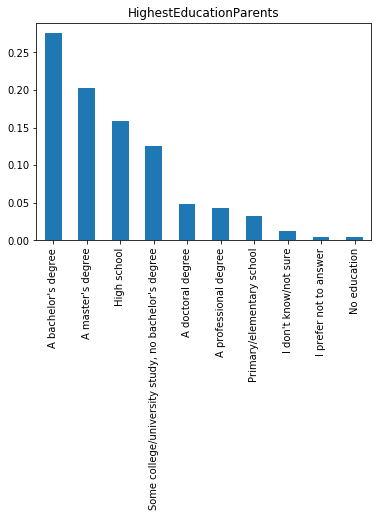

In [29]:
ed_vals =df.HighestEducationParents.value_counts()
(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("HighestEducationParents");

In [30]:
df_HighestEducationParents =df.loc[:, ['HighestEducationParents','Salary']].groupby(by='HighestEducationParents').mean().sort_values('Salary', ascending=False)

In [31]:
df_HighestEducationParents

,Salary
HighestEducationParents,
A doctoral degree,68611.436276
A professional degree,64436.422260
A master's degree,60454.005886
"Some college/university study, no bachelor's degree",60013.580080
A bachelor's degree,57204.205486
High school,50930.764811
I don't know/not sure,49553.558412
I prefer not to answer,45081.722501
Primary/elementary school,39337.837086


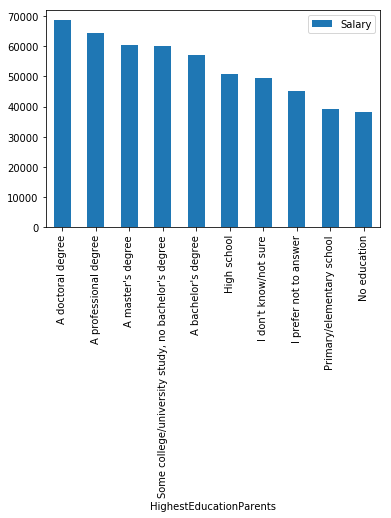

In [32]:
df_HighestEducationParents.plot(kind='bar')

In [33]:
df['EducationTypes'].value_counts()


Self-taught                                                                                                                                         870
On-the-job training; Self-taught                                                                                                                    589
Self-taught; Open source contributions                                                                                                              458
Online course; On-the-job training; Self-taught                                                                                                     450
Online course; Self-taught                                                                                                                          396
On-the-job training; Self-taught; Open source contributions                                                                                         277
Online course; Self-taught; Open source contributions                                   

In [34]:
df.loc[:, ['EducationTypes','Salary']].groupby(by='EducationTypes').mean().sort_values('Salary', ascending=False)

,Salary
EducationTypes,
Bootcamp; Industry certification; On-the-job training; Self-taught; Coding competition,164000.000000
Bootcamp; Industry certification; On-the-job training; Self-taught; Coding competition; Open source contributions,160000.000000
Industry certification; On-the-job training; Coding competition; Open source contributions,137000.000000
Online course; Bootcamp; Part-time/evening course; On-the-job training; Coding competition; Hackathon; Open source contributions,135000.000000
Part-time/evening course; Industry certification; Self-taught; Hackathon; Open source contributions,117500.000000
Online course; Bootcamp; Part-time/evening course; Self-taught; Open source contributions,114333.333333
Bootcamp; Part-time/evening course; Industry certification; On-the-job training; Self-taught; Open source contributions,113636.363636
Bootcamp; Part-time/evening course; Industry certification; On-the-job training; Self-taught; Coding competition; Hackathon; Open source contributions,110000.000000
Online course; Industry certification; Hackathon,110000.000000


In [35]:
print( get_desc('University',df2))

Are you currently enrolled in a formal, degree-granting college or university program?


In [36]:
df['University'].value_counts()

No                     11133
Yes, full-time           945
Yes, part-time           728
I prefer not to say       85
Name: University, dtype: int64

In [37]:
df.loc[:, ['University','Salary']].groupby(by='University').mean().sort_values('Salary', ascending=False)

,Salary
University,
No,59992.310288
"Yes, part-time",37980.275704
"Yes, full-time",29680.073818
I prefer not to say,25317.800321


In [38]:
print( get_desc('EducationImportant',df2))

Overall, how important has your formal schooling and education been to your career success?


In [39]:
df['EducationImportant'].value_counts()


Somewhat important      2476
Important               2222
Not very important      1966
Very important          1375
Not at all important    1019
Name: EducationImportant, dtype: int64

In [40]:
df_EducationImportants =df.loc[:, ['EducationImportant','Salary']].groupby(by='EducationImportant').mean().sort_values('Salary', ascending=False)

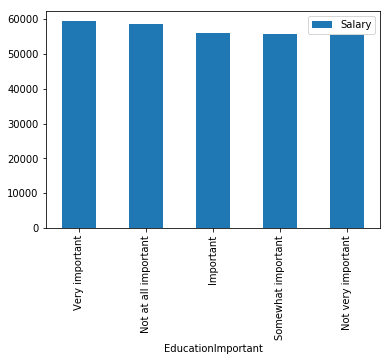

In [41]:
df_EducationImportants.plot(kind='bar')


In [42]:
df_EducationImportants

,Salary
EducationImportant,
Very important,59541.444482
Not at all important,58676.103645
Important,55949.466853
Somewhat important,55751.705967
Not very important,55498.730833


In [43]:
print( get_desc('EducationImportant',df2))

Overall, how important has your formal schooling and education been to your career success?


In [44]:
print( get_desc('University',df2))

Are you currently enrolled in a formal, degree-granting college or university program?


In [45]:
print( get_desc('HighestEducationParents',df2))

What is the highest level of education received by either of your parents?


In [46]:
df.loc[:, ['HighestEducationParents','Salary']].groupby(by='HighestEducationParents').mean().sort_values('Salary', ascending=False)

,Salary
HighestEducationParents,
A doctoral degree,68611.436276
A professional degree,64436.422260
A master's degree,60454.005886
"Some college/university study, no bachelor's degree",60013.580080
A bachelor's degree,57204.205486
High school,50930.764811
I don't know/not sure,49553.558412
I prefer not to answer,45081.722501
Primary/elementary school,39337.837086


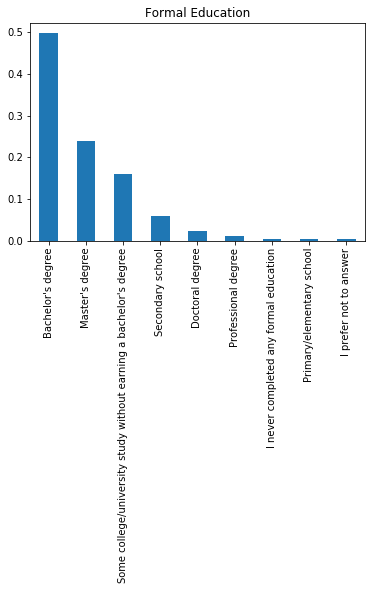

In [47]:
ed_vals =df.FormalEducation.value_counts()
#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");